In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/Enron_A2B2_nominal.csv
data/emails.csv
data/all_emails_categorical_hour.csv
data/archive.zip
data/tuesday_27_june_emails_categorical_hour.csv
data/emails_datetime.csv
data/val_emails_categorical_hour.csv
data/train_emails_categorical_hour.csv


### Import necessary libraries

In [2]:
import email

### Load Data

In [3]:
df = pd.read_csv("data/emails.csv")

### Data Exploration

In [4]:
# view first 5 rows of the dataset
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [5]:
# get shape of the data
df.shape

(517401, 2)

In [6]:
# a sample email
print(df.loc[1]['message'])

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the

In [7]:
# transform the email into correct format
message = df.loc[1]['message']
e = email.message_from_string(message)

e.items()

[('Message-ID', '<15464986.1075855378456.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 4 May 2001 13:51:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'john.lavorato@enron.com'),
 ('Subject', 'Re:'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen (Non-Privileged).pst')]

In [8]:
# get date
e.get('Date')

'Fri, 4 May 2001 13:51:00 -0700 (PDT)'

In [9]:
# show message body
e.get_payload()

"Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

### Extract headers

In [10]:
# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [11]:
df['datetime'] = get_field("Date", df['message'])
df.head(3)

,file,message,datetime
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)"
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)"
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)"


## Data Cleaning and Transformation

**date : column**

In [12]:
from dateutil import parser

# this is sample example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

04-05-2001 13:51:00


In [13]:
def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['datetime'] = change_type(df['datetime'])
df.head(2)

,file,message,datetime
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,14-05-2001 16:39:00
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,04-05-2001 13:51:00


In [14]:
df = pd.DataFrame(pd.to_datetime(df['datetime']))

Decompose email datetime and create a counter column initialized to constant 1 (unique mail)

In [15]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.weekday
df['hour'] = df['datetime'].dt.hour
df['counter'] = 1
df.drop(columns='datetime', inplace=True)

Aggregate mail counter by hour and drop hours that have no incoming mails

In [16]:
df = df.groupby(['hour', 'day', 'month', 'weekday']).agg({'counter':'sum'}).reset_index()
df.head(3)

,hour,day,month,weekday,counter
0,0,1,1,1,1
1,0,1,2,3,75
2,0,1,2,4,6


Transform attributed of the dataframe in categorical info

In [17]:
hour = pd.get_dummies(df['hour'], prefix_sep='_', prefix='hour', drop_first=True)
day = pd.get_dummies(df['day'], prefix_sep='_', prefix='day', drop_first=True)
month = pd.get_dummies(df['month'], prefix_sep='_', prefix='month', drop_first=True)
weekday = pd.get_dummies(df['weekday'], prefix_sep='_', prefix='weekday', drop_first=True)

Merge the original Dataframe with the categorical computed feature (order id preserved)

In [18]:
df = pd.concat([df, hour, day, month, weekday], axis=1, )

Drop the numerical Dataframe attributes

In [19]:
df.drop(columns=['hour', 'day', 'month', 'weekday'], axis=1, inplace=True)
df

,counter,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,75,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18122,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18123,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18124,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18125,57,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


Save csv to file

<AxesSubplot:>

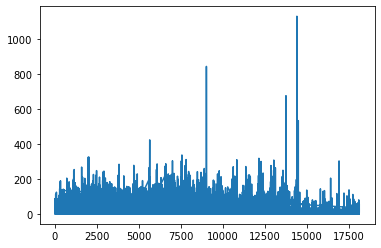

In [20]:
df = df.sort_values(by=[f'day_{i}' for i in range(1,31) if f'day_{i}' in df.columns])
df['counter'].plot()

In [21]:
plt.plot([df[f'day_{i}'].value_counts()[1] for i in range(0,32) if f'day_{i}' in df.columns])

NameError: name 'plt' is not defined

In [ ]:
plt.plot([df[f'day_{i}'].value_counts()[1] for i in range(1,)])

In [ ]:
[f'day_{i}' for i in range(1,31) if f'day_{i}' in df.columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = df['counter'].plot()
ax.set_ylabel('Hourly mail income')

In [ ]:
df.nlargest(5, columns=['counter']).iloc[:, 24:54]

Since Tuesday (weekday_2), June (month_6) 27th (day_27) is the day with the highest number of incoming mails (outlier), we select it as the blind test set day. We then validate our model on a 10% validation set. 

In [ ]:
df_test = df[df['weekday_2']==1]
df_test = df_test[df_test['month_6']==1]
df_test = df_test[df_test['day_27']==1]
df_test

In [ ]:
df_train = df.drop(df_test.index)
df_val = df_train.sample(frac=0.1, random_state=99)
df_train = df.drop(df_val.index)

In [ ]:
df.to_csv('data/all_emails_categorical_hour.csv',index=False)
df_train.to_csv('data/train_emails_categorical_hour.csv',index=False)
df_val.to_csv('data/val_emails_categorical_hour.csv',index=False)
df_test.to_csv('data/tuesday_27_june_emails_categorical_hour.csv',index=False)